In [ ]:
'''
Isolation Forest
    - Isolation Forests(IF), similar to Random Forests, are build based on decision trees
    - It is an unsupervised model (Outlier detection)
    - Isolation Forest is an outlier detection technique that identifies anomalies instead of normal observations
    - Similarly to Random Forest, it is built on an ensemble of binary (isolation) trees

How It Works?
    - Randomly sub-sampled data is processed in a tree structure based on randomly selected features
    - The samples that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them.
    - Similarly, the samples which end up in shorter branches indicate anomalies as it was easier for the tree to separate 
      them from other observations.

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
### 

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

data = pd.read_csv('marks.csv')
data.head(10)

,Student_id,Mark
0,1,95
1,2,70
2,3,98
3,4,75
4,5,89
5,6,69
6,7,52
7,8,54
8,9,55
9,10,94


In [10]:
data[data['Mark']>100] # Outliers in the dataset

,Student_id,Mark
32,33,2000
76,75,1500
113,111,300
155,152,4000


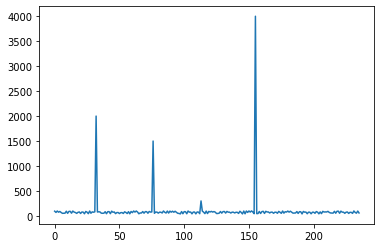

In [11]:
import matplotlib.pyplot as plt

plt.plot(data['Mark'])

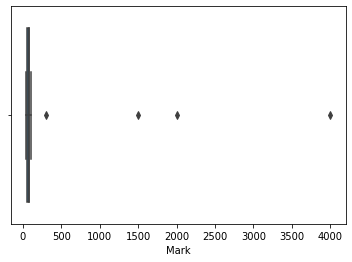

In [12]:
import seaborn as sns
sns.boxplot(data['Mark'])

In [13]:
random_state = np.random.RandomState(100)

model=IsolationForest(n_estimators=5000,max_samples='auto',contamination=float(0.2),random_state=random_state)

model.fit(data[['Mark']])

print(model.get_params())


{'behaviour': 'deprecated', 'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 5000, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x23AA3BE6488, 'verbose': 0, 'warm_start': False}


In [14]:
data['scores'] = model.decision_function(data[['Mark']])

data['anomaly_score'] = model.predict(data[['Mark']])

data[data['anomaly_score']==-1].head()

,Student_id,Mark,scores,anomaly_score
0,1,95,-0.004009,-1
23,24,43,-0.015736,-1
26,27,45,-0.008812,-1
32,33,2000,-0.371193,-1
40,40,44,-0.024593,-1


In [15]:
data

,Student_id,Mark,scores,anomaly_score
0,1,95,-0.004009,-1
1,2,70,0.025153,1
2,3,98,0.008184,1
3,4,75,0.080581,1
4,5,89,0.035214,1
...,...,...,...,...
231,228,99,-0.054762,-1
232,229,70,0.025153,1
233,230,55,0.036789,1
234,231,97,0.007567,1
